# Increasing depth

We have learned two types of layers for neural networks, we began with convolutional layers wich detect regional patterns in an image using a series of image filters. We have seen how typically a ReLu activation function is applied to the output of these filters to standarize their output values. Then we learned about maxpooling layers, which appear after convolutional layers to reduce the dimensionality of our input arrays. These new layers, along with fully-connected layers, are often the only layers that we will find in CNNs.

Let's discuse how to arrange these layers to design a complete CNN architecture, we will focus again on CNNs for image classification. In this case, our CNN must accept an image array as an input. Now, if we are going to work with messy real-world images, there is a complication that we haven't yet discussed.

If we go online and collect thousands or million of images, it is pretty much guaranteed that they will all be different sizes. Similar to MLPs, the CNN we will discuss will require a fixed size input. So we have to pick an image size and resize all of our images to that same size before doing anything else. 

This is considered to be another pre-processing step, alongside normalization and conversion to a tensor datatype. It is very common to resize each image to be a square, with the spatial dimensions equal to a power of 2, or else a number that's divisible by a large power of two. 

We will be working with a dataset composed of images that have all been resized to 32x32 pixels. Recall that any image is interpreted by the computer as a 3D array. Color images had some height and width in pixels along with red, blue and green color channels corresponding to a depth of three. Gray scale images, while technically 2D, can also be thought of as having their own width and height and a depth of one.

For both of these cases, with color or grayscale, the input array will always be much taller and wider than it is depth.

Our CNN architecture will be designed with the goal of taking that array and gradually making it much deeper than it is tall or wide. Convolutional layers will be used to make the array deeper as it passes through the network, and maxpooling layers will be used to decrease the X, Y dimensions. As the network gets deeper, it is actually extracting more and more complex patterns and features that help identify the content and the objects in an image, and it is actually discarding some spatial information about features like a smooth background and so on that do not help identify the image. 

Let's go over a complete image classification CNN in detail!

Say we want to classify an input image. There are a few ways we could go about this using a deep learning architecture. Consider following the input layer with a sequence of convolutional layers. This stack will discover hierarchies of spatial patterns in the image. The first layer of filters looks at patterns in the input image, the second looks at patterns in the previous convolutional layer, and so on. Each of the convolutional layers requires us to specify a number of hyperparameters.

```
self.conv1 = nn.Conv2d(3, 16, kernel_size, stride = 1, padding = 0)
```

The first and second inputs to define a convolutional layer are simply the depth of the input and the desired depth of the output. For example, the input depth of a color image will be three for the RGB channels, and we might want to produce 16 different filtered images in the convolutional layer above. 

Next we define the size of the filters that define a convolutional layer: **kernel_size**, these are often square and range from the size of two-by-two at the smallest to up to a seven-by-seven or so for very large images. For this example let's choose to use three-by-three filters.

```
self.conv1 = nn.Conv2d(3, 16, 3, stride = 1, padding = 0)
```

The stride is generally set to one and many frameworks will have this as the default value, so we may need to input this value. As for padding, we may get better results if we set our padding such that a convolutional layer will have the same width and height as its input from the previous layer. In the case of a 3x3 filter, which can almost center itself perfectly on an image but misses the border pixels by one, this padding will be equal to one.


### Padding 

Padding is just adding a border of pixels around an image. In PyTorch, we specify the size of this border. Why do we need padding?

When we create a convolutional layer, we move a square filter around an image, using a center-pixel as an anchor. So, this kernel cannot perfectly overlay the edges/corners of images. The nice feature of padding is that it will allow us to control the spatial size of the output volumes (most commonly as we will see soon we will use it to exactly preserve the spatial size of the input volume so the input and output width and height are the same).

The most common methods of padding are padding an image with all 0-pixels (zero padding) or padding them with the nearest pixel value. [Here](http://cs231n.github.io/convolutional-networks/#conv) we can read more about calculating the amount of padding, given a kernel_size.

When deciding the depth or number of fliters in a convolutional layer, often we will have a number of filters increase in sequence. So, the first convolutional layer might have 16 filters. The second will see that depth as input and produce a layer with a depth of 32. The third will have a depth of 64 and so on. After each convolutional layer, we will apply a ReLU activation function. 

If we follow tis process, we have a method for gradually increasing the depth of our array without modifying the height and width. The input, just like all of the layers in this sequence, has a height and width of 32. But the depth increases from an input layers depth of 3 to 16 to 32 to 64. 

<img src="assets/IncreasingDepth.png">

```
self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
```

We call that, yes we wanted to increase the depth, but we also wanted to decrease the height and width and discard some spatial information. This is where maxpooling layers will come in. They generally follow every one or two convolutional layers in the sequence. 

Below, one such example with a max pooling layer after each convolutional layer. 

<img src="assets/MaxpoolingOnCNN.png">

To define a max pooling layers, we will onlu need to define the filter size and stride. The most common setting will use filters of size two with a stride of two.

```
self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)

# self.maxpooling = nn.MaxPool2d(kernel_size, stride)
self.maxpooling = nn.MaxPool2d(2, 2)
```

This has the effect of making the X,Y dimensions half of what they were from the previous layer. In this way, the combination of convolutional and max pooling layers accomplishes our goal of attaining an array that is quite deep but small in the X and Y dimensions.

Quick quiz
- Question 1: How might we define a [Maxpooling layer](https://pytorch.org/docs/stable/nn.html#maxpool2d) such that it down-samples an input by a factor of 4?

<img src="assets/AnswerQuizCNN1.png">

That's right! The best choice would be to use a kernel and stride of 4, so that the maxpooling function sees every input pixel once, but any layer with a stride of 4 will down-sample an input by that factor.

- Question 2: If we want to define a convolutional layer that is the same x-y size as an input array, what **padding** should we have for a `kernel_size` of 7?

<img src="assets/AnswerQuizCNN2.png">

Yes! If we overlay a 7x7 kernel so that its center-pixel is at the right-edge of an image, we will have 3 kernel columns that do not overlay anything! So, that's how big your padding needs to be.

# PyTorch Layer Documentation 

## Convolutional Layers

We typically define a convolutional layer in PyTorch using `nn.Conv2d`, with the following parameters specified:
```
nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

- `in_channels` refers to the depth of an input. For a graysacale image, this depth = 1
- `out_channels` refers to the desired depth of the output, or the number of filtered images we want to get as output.
- `kernel_size` is the size of our convolutional kernel, most commonly 3 for a 3x3 kernel.
- `stride` and `padding` have default values, but should be set depending on how large we want our output to be in the spatial dimensions x, y

[Read more about COnv2d in the docs](https://pytorch.org/docs/stable/nn.html#conv2d).

## Pooling layers

Maxpooling layers commonly come after convolutional layers to shrink the x-y dimensions of an input, read more about pooling layers in PyTorch, [here](https://pytorch.org/docs/stable/nn.html#maxpool2d).

# Convolutional layer in PyTorch

To create a convolutional layer in PyTorch, we must first import the necessary module:

```
import torch.nn as nn
```

Then, there is a two part process to defining a convolutional layer and defining the feedforward behavior of a model (how an input moves through the layers of a network). First, we must define a Model class and fill in two functions.

### init

We can define a convolutional layer in the `__init__` function of by using the following format:

```
self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

### forward

Then, we refer to that layer in the forward function. So we pass in an input image `x` and applyung a ReLU function to hte output of this layer.

```
x = F.relu(self.conv1(x))
```

### Arguments

We must pass the next arguments:

- `in_channels` The number of inputs (in depth), 3 for an RGB image, for example.
- `out_channels` The number of output channels, i.e. the number of filtered "images" a convolutional layer is made of or the number of unique, convolutional kernels that will be applied to an input.
- `kernel_size` Number specifying both the height and width of the (square) convolutional kernel.

There are some additional, optional arguments that we might like to tune:

- `stride` The stride of the convolution. If you don't specify anything, stride is set to 1.
- `padding` The border of 0's around an input array. If you don't specify anything, padding is set to 0.

It is possible to represent both `kernel_size` and `stride` as either a number or a tuple.

There are many other tunable arguments that we can set to change the behavior of our convolutional layers. To read more about these, we recommend perusing the official [docs](https://pytorch.org/docs/stable/nn.html#conv2d)

# Pooling layers

Pooling layers take in a kernel_size and a stride. Typically the same value as is the down-sampling factor. For example, the following code will down-sample and input's x-y dimensions, by a factor of 2:

```
self.pool = nn.Maxpool2d(2, 2)
```

### forward

Then, we see that poling layer being applied in the forward function:

```
x = F.relu(self.conv1(x))
x = self.pool(x)
```

### Convolutional Example 1

Say we are constructing a CNN, and our input layer accepts grayscale images that are 200 by 200 pixels (corresponding to a 3D array with height 200, width 200, and depth 1). Then, say we'd like the next layer to be a convolutional layer with 16 filters, each filter having a width and height of 2. When performing the convolution, we'd like the filter to jump two pixels at a time. We also don't want the filter to extend outside of the image boundaries; in other words, we don't want to pad the image with zeros. Then, to construct this convolutional layer, I would use the following line of code:

```
self.conv1 = nn.Conv2d(1, 16, 2, stride=2)
```

### Convolutional Example 2

Say we'd like the next layer in our CNN to be a convolutional layer that takes the layer constructed in Example 1 as input. Say we'd like our new layer to have 32 filters, each with a height and width of 3. When performing the convolution, we'd like the filter to jump 1 pixel at a time. We want this layer to have the same width and height as the input layer, and so we will pad accordingly. Then, to construct this convolutional layer, we would use the following line of code:

```
self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
```

# Sequential models

We can also create a CNN in PyTorch by using a `Sequential` wrapper in the `__init__` function. Sequential allows us to stack different types of layers, specifying activation functions in between:

```
def __init__(self):
    super(ModelName, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 16, 2, stride=2),
        nn.MaxPool2d(2, 2),
        nn.ReLU(True),
        
        nn.Conv2d(16, 32, 3, padding=1),
        nn.MaxPool2d(2, 2),
        nn.ReLU(True)
    )
```

### Formula: Number of parameters in a convolutional layer

The number of parameters in a convolutional layer depends on the supplied values of `filters/out_channels`, `kernel_size`, and `input_shape`. Let's define a few variables:

- `K` the number of filters in the convolutional layer
- `F` the height and width of the convolutional filters
- `D_in` the depth of the previous layer

Notice that `K` = `out_channels`, and `F` = `kernel_size`. Likewise, `D_in` is the last value in the `input_shape` tuple, typically 1 or 3 (grayscale and RGB).

Since there are `F*F*D_in` weights per filter, and the convolutional layer is composed of `K`filters, the total number of weights in the convolutional layer is `K*F*F*D_in`. Since there is one bias term per filter, the convolutional layer has `K` biases. Thus, the **number of parameters** in the convolutional layer is given by `K*F*F*D_in + K`.

### Formula: Shape of a Convolutional Layer

The shape of a convolutional layer depends on the supplied values of `kernel_size`, `input_shape`, `padding`, and `stride`. Let's define a few variables:

- `K` the number of filters in the convolutional layer
- `F` the height and width of the convolutional filters
- `S` the stride of the convolution
- `P` the padding
- `W_in` the width/height (square) of the previous layer

Notice that `K`= `out_channels`, `F` = `kernel_size`, and `S`= `stride`. Likewise, `W_in`is the first and second value of the `input_shape` tuple.

The **depth** of the convolutional layer will always equal the number of filters `K`.

The spatial dimensions of a convolutional layer can be calculated as: `(W_in-F+2P)/S+1`.

# Flattening

Part of completing a CNN architecture, is to flatten the eventual output of a series of convolutional and pooling layers, so that all parameters can be seen (as a vector) by a linear classification layer. At this step, it is imperative that we know exactly how many parameters are output by a layer.

For the following quiz questions, we consider an input image that is `130x130 (x, y) and 3` in depth (RGB). Say, this image goes through the following layers in order:

```
nn.Conv2d(3, 10, 3)
nn.MaxPool2d(4, 4)
nn.Conv2d(10, 20, 5, padding=2)
nn.MaxPool2d(2, 2)
```

## Quick quiz

- Question 1: After going through all four of these layers in sequence, what is the depth of the final output?

<img src="assets/AnswerQuizCNN3.png">

That's right, the final depth is determined by the last convolutional layer, which has a depth = out_channels = 20.

- Question 2: What is the x-y size of the output of the final maxpooling layer? Careful to look at how the 130x130 image passes through (and shrinks) as it moved through each convolutional and pooling layer.

<img src="assets/AnswerQuizCNN4.png">

That's right! The 130x130 image shrinks by one after the first convolutional layer, then is down-sampled by 4 then 2 after each successive maxpooling layer!

- Question 3: How many parameters, total, will be left after an image passes through all four of the above layers in sequence?

<img src="assets/AnswerQuizCNN5.png">

That's right! It's the x-y size of the final output times the number of final channels/depth = `16*16*20`.

# Feature vector

The job of a convolutional neural network is to discover patterns contained in an image. A sequence of layers is responsible for this discovery. The layers in a CNN convert an input image array into a representation that encodes only the content of the image. This is often called a feature level representation of an image or a feature vector. 

It may be helpful to think about it like this, take two input images that are both images of a car. Both are very different, and if I was to frame these pictures, the detail would be what makes them stylistically interesting. But for an image classifier, it only wants to kniw that these are both images of cars. When we look at how these images are transormed as they move through several layers of a CNN, the exact original pixel values matter less and less. The two trasformed outputs should start to look much more similar to one another, moving closer towards the idea that both are a car rather than the details about what the cars look like. Later layers in a CNN have discarded information about style and texture, and instead are pushed towards answering questions about general shape, and about the presence of unique patterns, like "Are there wheels in the image?", "What about three legs or tails?". Once we get to a representation where the content of an image has been distilled like this, we can flatten the array into a feature vector and feed it to one or more fully connected layers to determine what object is contained in the image. For instance, if wheels were found after the last max pooling layer, the feature vector will be able to reflect that and the fully connected layer will transform that information to predict that a car is present in the image with higher probability. If there were eyes, three legs, and a tail, then the output layer would take that information and deduce that a dog is likely present in the image.

<img src="assets/featureVectors.png">

But of course, to emphasize, all this understanding in the model, is not pre-specified bias. It is learned by the model during training and through back-propagation that updates the weights that define the filters and the weights in the fully connected layers. This architecture that we are specifying just gives the model a structure that will allow it to train better. So, it has the potential to classify objects with greater accuracy. Next, we will start to define a CNN architecture for image classification, and we will get to practice coding on our own.

# Convolutional Neural Networks
---
we will train a **CNN** to classify images from the CIFAR-10 database.

The images in this database are small color images that fall into one of ten classes; some example images are pictured below.

<img src='assets/cifar_data.png' width=70% height=70% />

### Test for [CUDA](http://pytorch.org/docs/stable/cuda.html)

Since these are larger (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, only they utilize GPU's for computation.

In [1]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


---
## Load the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a minute. We load in the training and test data, split the training data into a training and validation set, then create DataLoaders for each of these sets of data.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

100.0%

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Visualize a Batch of Training Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

/Users/mb78200/opt/anaconda3/envs/my_p3_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


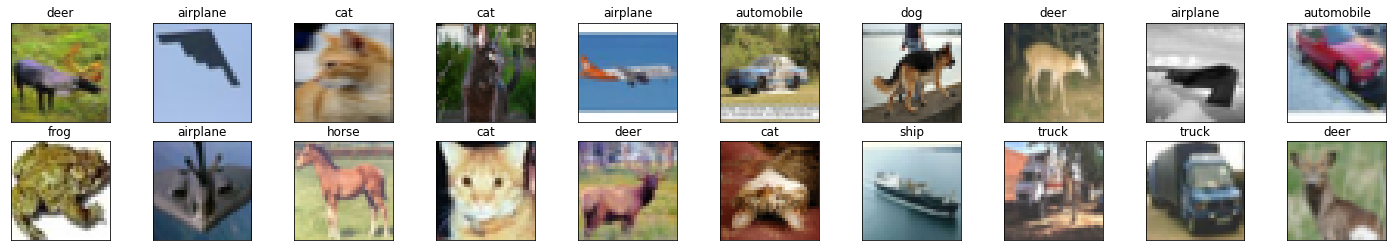

In [4]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.

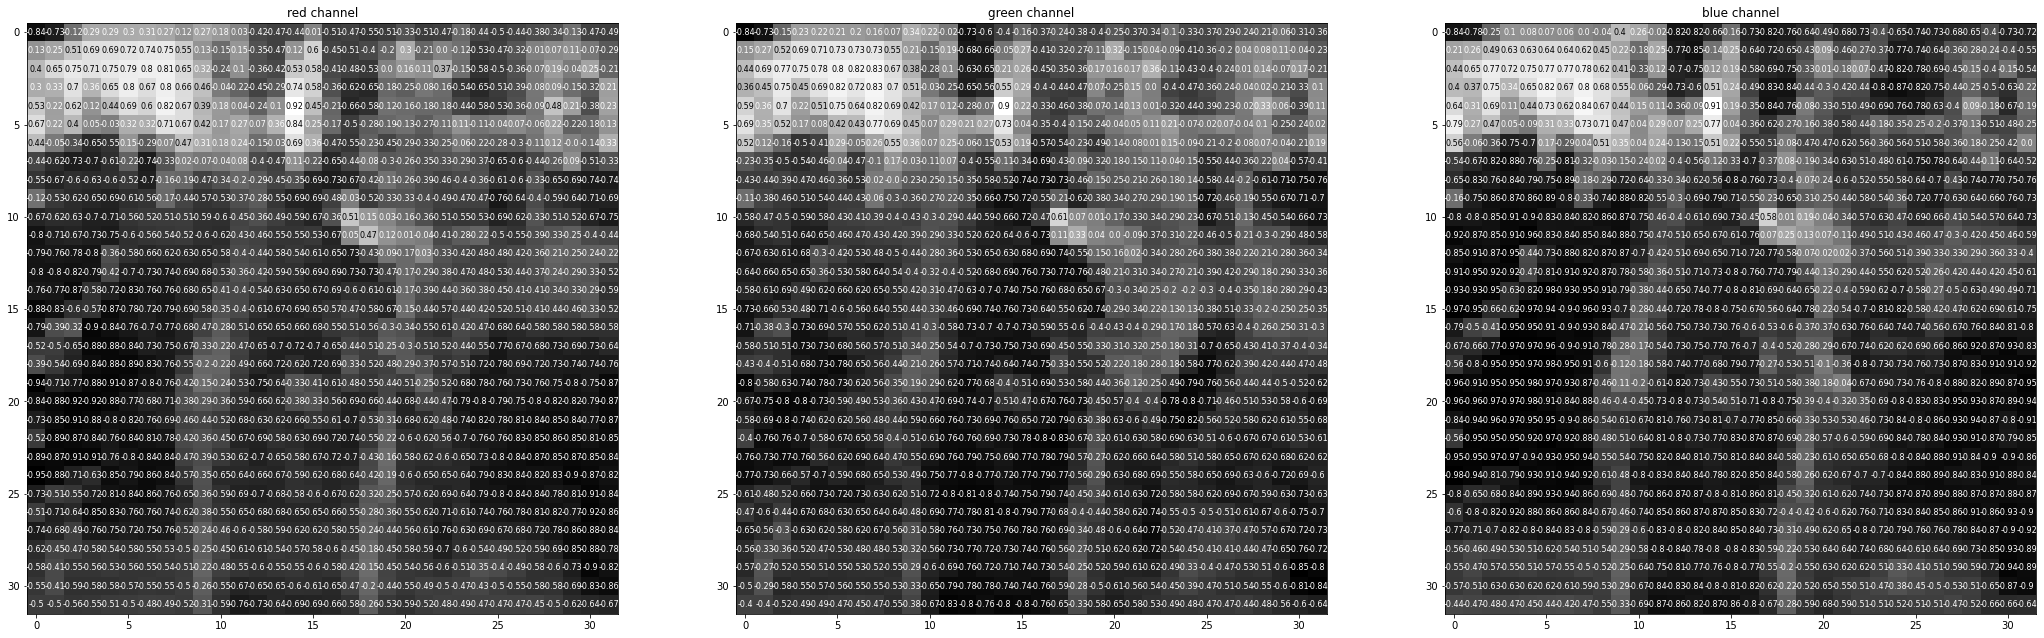

In [5]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

This time, we'll define a CNN architecture. Instead of an MLP, which used linear, fully-connected layers, you'll use the following:
* [Convolutional layers](https://pytorch.org/docs/stable/nn.html#conv2d), which can be thought of as stack of filtered images.
* [Maxpooling layers](https://pytorch.org/docs/stable/nn.html#maxpool2d), which reduce the x-y size of an input, keeping only the most _active_ pixels from the previous layer.
* The usual Linear + Dropout layers to avoid overfitting and produce a 10-dim output.

A network with 2 convolutional layers is shown in the image below and in the code, and you've been given starter code with one convolutional and one maxpooling layer.

<img src='assets/2_layer_conv.png' height=50% width=50% />

#### TODO: Define a model with multiple convolutional layers, and define the feedforward network behavior.

The more convolutional layers you include, the more complex patterns in color and shape a model can detect. It's suggested that your final model include 2 or 3 convolutional layers as well as linear layers + dropout in between to avoid overfitting. 

It's good practice to look at existing research and implementations of related models as a starting point for defining your own models. You may find it useful to look at [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) or [this, more complex Keras example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py) to help decide on a final structure.

#### Output volume for a convolutional layer

To compute the output size of a given convolutional layer we can perform the following calculation (taken from [Stanford's cs231n course](http://cs231n.github.io/convolutional-networks/#layers)):
> We can compute the spatial size of the output volume as a function of the input volume size (W), the kernel/filter size (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. The correct formula for calculating how many neurons define the output_W is given by `(W−F+2P)/S+1`. 

For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.

In [32]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # second covolutional layer
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # third covolutional layer
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # linear layer (64 * 4 * 4 -> 512)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        # linear layer (512 -> 256)
        self.fc2 = nn.Linear(512, 256)
        # linear layer (256 -> 10)
        self.fc3 = nn.Linear(256, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        # add dropout layer
        x = self.dropout(x)
        # add 3nd hidden layer, with relu activation function
        x = self.fc3(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

Decide on a loss and optimization function that is best suited for this classification task. The linked code examples from above, may be a good starting point; [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) or [this, more complex Keras example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py). Pay close attention to the value for **learning rate** as this value determines how your model converges to a small error.

#### TODO: Define the loss and optimizer and see how these choices change the loss over time.

In [33]:
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Train the Network

Remember to look at how the training and validation loss decreases over time; if the validation loss ever increases it indicates possible overfitting.

In [14]:
# number of epochs to train the model
n_epochs = 8 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.740326 	Validation Loss: 0.384346
Validation loss decreased (inf --> 0.384346).  Saving model ...
Epoch: 2 	Training Loss: 1.427631 	Validation Loss: 0.318518
Validation loss decreased (0.384346 --> 0.318518).  Saving model ...
Epoch: 3 	Training Loss: 1.247846 	Validation Loss: 0.283023
Validation loss decreased (0.318518 --> 0.283023).  Saving model ...
Epoch: 4 	Training Loss: 1.129998 	Validation Loss: 0.262096
Validation loss decreased (0.283023 --> 0.262096).  Saving model ...
Epoch: 5 	Training Loss: 1.042769 	Validation Loss: 0.238012
Validation loss decreased (0.262096 --> 0.238012).  Saving model ...
Epoch: 6 	Training Loss: 0.967108 	Validation Loss: 0.221873
Validation loss decreased (0.238012 --> 0.221873).  Saving model ...
Epoch: 7 	Training Loss: 0.902338 	Validation Loss: 0.208724
Validation loss decreased (0.221873 --> 0.208724).  Saving model ...
Epoch: 8 	Training Loss: 0.851088 	Validation Loss: 0.196474
Validation loss decreased (0.20872

###  Load the Model with the Lowest Validation Loss

In [15]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

---
## Test the Trained Network

Test our trained model on previously unseen data! A "good" result will be a CNN that gets around 70% (or more, try your best!) accuracy on these test images.

In [16]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.990871

Test Accuracy of airplane: 77% (771/1000)
Test Accuracy of automobile: 82% (824/1000)
Test Accuracy of  bird: 44% (444/1000)
Test Accuracy of   cat: 41% (415/1000)
Test Accuracy of  deer: 46% (466/1000)
Test Accuracy of   dog: 60% (605/1000)
Test Accuracy of  frog: 77% (776/1000)
Test Accuracy of horse: 67% (673/1000)
Test Accuracy of  ship: 78% (787/1000)
Test Accuracy of truck: 72% (728/1000)

Test Accuracy (Overall): 64% (6489/10000)


### Visualize Sample Test Results

/Users/mb78200/opt/anaconda3/envs/my_p3_env/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


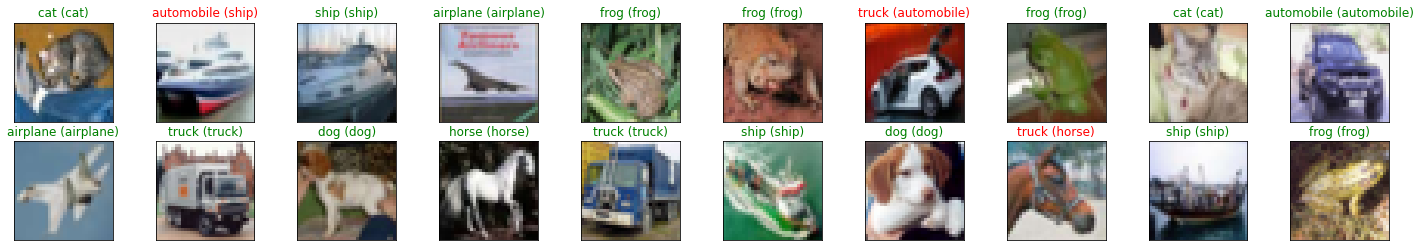

In [17]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

Ok, a general 64% of accuracy is low, let's try with other architecture:

In [21]:
# define the second CNN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # second covolutional layer
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # third covolutional layer
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # linear layer (64 * 4 * 4 -> 512)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        # linear layer (512 -> 10)
        self.fc2 = nn.Linear(512, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model2 = Net2()
print(model2)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model2.cuda()

Net2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [22]:
# specify loss function
criterion2 = nn.CrossEntropyLoss()

# specify optimizer
optimizer2 = optim.SGD(model2.parameters(), lr=0.001)

In [24]:
# number of epochs to train the model
n_epochs = 8 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model2.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the batch loss
        loss = criterion2(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model2.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the batch loss
        loss = criterion2(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model2.state_dict(), 'model2_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.668781 	Validation Loss: 0.406183
Validation loss decreased (inf --> 0.406183).  Saving model ...
Epoch: 2 	Training Loss: 1.612135 	Validation Loss: 0.395103
Validation loss decreased (0.406183 --> 0.395103).  Saving model ...
Epoch: 3 	Training Loss: 1.574626 	Validation Loss: 0.385687
Validation loss decreased (0.395103 --> 0.385687).  Saving model ...
Epoch: 4 	Training Loss: 1.538284 	Validation Loss: 0.374710
Validation loss decreased (0.385687 --> 0.374710).  Saving model ...
Epoch: 5 	Training Loss: 1.493788 	Validation Loss: 0.361856
Validation loss decreased (0.374710 --> 0.361856).  Saving model ...
Epoch: 6 	Training Loss: 1.445943 	Validation Loss: 0.348434
Validation loss decreased (0.361856 --> 0.348434).  Saving model ...
Epoch: 7 	Training Loss: 1.399486 	Validation Loss: 0.336041
Validation loss decreased (0.348434 --> 0.336041).  Saving model ...
Epoch: 8 	Training Loss: 1.358156 	Validation Loss: 0.325398
Validation loss decreased (0.33604

In [25]:
model2.load_state_dict(torch.load('model2_cifar.pt'))

<All keys matched successfully>

In [26]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the batch loss
    loss = criterion2(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.615645

Test Accuracy of airplane: 43% (431/1000)
Test Accuracy of automobile: 52% (527/1000)
Test Accuracy of  bird:  8% (84/1000)
Test Accuracy of   cat: 27% (279/1000)
Test Accuracy of  deer: 26% (269/1000)
Test Accuracy of   dog: 38% (386/1000)
Test Accuracy of  frog: 53% (530/1000)
Test Accuracy of horse: 54% (549/1000)
Test Accuracy of  ship: 54% (540/1000)
Test Accuracy of truck: 52% (525/1000)

Test Accuracy (Overall): 41% (4120/10000)


Okay, we did exactly the opposite of what we wanted to do. So, we can make a third attempt

In [27]:
# define the third CNN architecture
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model3 = Net3()
print(model3)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model3.cuda()

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [28]:
# specify loss function (categorical cross-entropy)
criterion3 = nn.CrossEntropyLoss()

# specify optimizer
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)

In [29]:
# number of epochs to train the model
n_epochs = 8

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model3.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion3(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model3.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion3(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model3.state_dict(), 'model3_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.117285 	Validation Loss: 1.812241
Validation loss decreased (inf --> 1.812241).  Saving model ...
Epoch: 2 	Training Loss: 1.676261 	Validation Loss: 1.542250
Validation loss decreased (1.812241 --> 1.542250).  Saving model ...
Epoch: 3 	Training Loss: 1.489992 	Validation Loss: 1.396994
Validation loss decreased (1.542250 --> 1.396994).  Saving model ...
Epoch: 4 	Training Loss: 1.376665 	Validation Loss: 1.288309
Validation loss decreased (1.396994 --> 1.288309).  Saving model ...
Epoch: 5 	Training Loss: 1.274433 	Validation Loss: 1.180246
Validation loss decreased (1.288309 --> 1.180246).  Saving model ...
Epoch: 6 	Training Loss: 1.184006 	Validation Loss: 1.115436
Validation loss decreased (1.180246 --> 1.115436).  Saving model ...
Epoch: 7 	Training Loss: 1.108213 	Validation Loss: 1.065560
Validation loss decreased (1.115436 --> 1.065560).  Saving model ...
Epoch: 8 	Training Loss: 1.045615 	Validation Loss: 0.987241
Validation loss decreased (1.06556

In [30]:
model3.load_state_dict(torch.load('model3_cifar.pt'))

<All keys matched successfully>

In [31]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model3.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model3(data)
    # calculate the batch loss
    loss = criterion3(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.981086

Test Accuracy of airplane: 65% (653/1000)
Test Accuracy of automobile: 85% (852/1000)
Test Accuracy of  bird: 58% (587/1000)
Test Accuracy of   cat: 47% (476/1000)
Test Accuracy of  deer: 50% (508/1000)
Test Accuracy of   dog: 58% (589/1000)
Test Accuracy of  frog: 70% (705/1000)
Test Accuracy of horse: 69% (690/1000)
Test Accuracy of  ship: 83% (830/1000)
Test Accuracy of truck: 64% (643/1000)

Test Accuracy (Overall): 65% (6533/10000)


Well first and third are pretty similar, so let's take both and train them for more epochs

In [34]:
# Model 1
# number of epochs to train the model
n_epochs = 30 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.725991 	Validation Loss: 0.379606
Validation loss decreased (inf --> 0.379606).  Saving model ...
Epoch: 2 	Training Loss: 1.391751 	Validation Loss: 0.306676
Validation loss decreased (0.379606 --> 0.306676).  Saving model ...
Epoch: 3 	Training Loss: 1.211756 	Validation Loss: 0.281450
Validation loss decreased (0.306676 --> 0.281450).  Saving model ...
Epoch: 4 	Training Loss: 1.118155 	Validation Loss: 0.262120
Validation loss decreased (0.281450 --> 0.262120).  Saving model ...
Epoch: 5 	Training Loss: 1.034277 	Validation Loss: 0.238829
Validation loss decreased (0.262120 --> 0.238829).  Saving model ...
Epoch: 6 	Training Loss: 0.963673 	Validation Loss: 0.222823
Validation loss decreased (0.238829 --> 0.222823).  Saving model ...
Epoch: 7 	Training Loss: 0.903529 	Validation Loss: 0.213263
Validation loss decreased (0.222823 --> 0.213263).  Saving model ...
Epoch: 8 	Training Loss: 0.847118 	Validation Loss: 0.199191
Validation loss decreased (0.21326

In [35]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

In [36]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.701506

Test Accuracy of airplane: 83% (830/1000)
Test Accuracy of automobile: 85% (856/1000)
Test Accuracy of  bird: 64% (644/1000)
Test Accuracy of   cat: 51% (517/1000)
Test Accuracy of  deer: 78% (785/1000)
Test Accuracy of   dog: 66% (664/1000)
Test Accuracy of  frog: 87% (876/1000)
Test Accuracy of horse: 78% (785/1000)
Test Accuracy of  ship: 86% (860/1000)
Test Accuracy of truck: 85% (859/1000)

Test Accuracy (Overall): 76% (7676/10000)


Well, we could stop on epoch number 20 and we get a pretty similar result, now we have a 76% accuracy with model 1. Good job but let's se the model 3:

In [38]:
# define the third CNN architecture
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model3 = Net3()
print(model3)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model3.cuda()

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [39]:
# specify loss function (categorical cross-entropy)
criterion3 = nn.CrossEntropyLoss()

# specify optimizer
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)

In [40]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model3.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion3(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model3.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion3(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model3.state_dict(), 'model3_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.137423 	Validation Loss: 1.819396
Validation loss decreased (inf --> 1.819396).  Saving model ...
Epoch: 2 	Training Loss: 1.671283 	Validation Loss: 1.503632
Validation loss decreased (1.819396 --> 1.503632).  Saving model ...
Epoch: 3 	Training Loss: 1.476452 	Validation Loss: 1.379309
Validation loss decreased (1.503632 --> 1.379309).  Saving model ...
Epoch: 4 	Training Loss: 1.356974 	Validation Loss: 1.247102
Validation loss decreased (1.379309 --> 1.247102).  Saving model ...
Epoch: 5 	Training Loss: 1.253141 	Validation Loss: 1.166078
Validation loss decreased (1.247102 --> 1.166078).  Saving model ...
Epoch: 6 	Training Loss: 1.169831 	Validation Loss: 1.111968
Validation loss decreased (1.166078 --> 1.111968).  Saving model ...
Epoch: 7 	Training Loss: 1.097556 	Validation Loss: 1.007714
Validation loss decreased (1.111968 --> 1.007714).  Saving model ...
Epoch: 8 	Training Loss: 1.033606 	Validation Loss: 0.983982
Validation loss decreased (1.00771

In [41]:
model3.load_state_dict(torch.load('model3_cifar.pt'))

<All keys matched successfully>

In [42]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model3.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model3(data)
    # calculate the batch loss
    loss = criterion3(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.713826

Test Accuracy of airplane: 80% (800/1000)
Test Accuracy of automobile: 88% (888/1000)
Test Accuracy of  bird: 68% (688/1000)
Test Accuracy of   cat: 54% (547/1000)
Test Accuracy of  deer: 71% (710/1000)
Test Accuracy of   dog: 65% (655/1000)
Test Accuracy of  frog: 87% (873/1000)
Test Accuracy of horse: 76% (761/1000)
Test Accuracy of  ship: 83% (836/1000)
Test Accuracy of truck: 81% (811/1000)

Test Accuracy (Overall): 75% (7569/10000)


Well, the model 1 wins for 1%, for now..

Let's explain some things to make clear the architecture:

```
# convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

```

We have defined above three convolutional layers, each of these layers uses a convolutional kernel of size 3x3 and has a padding of 1. We also have a pooling layer which will be taking the output of our convolutional layers and will down-sample any X, Y size by 2. 

Because we are building a complete architecture, it's pretty important to don't forget to add a dropout layer, in this case with a probability of 25% to prevent overfitting. And the second important part is to add fully connected layers, in this case we have added 2 of them. The first layer is responsible for taking as input our final downside stack of feature maps.

We know that our original input image which is 32x32 pixels by 3 (because of RGB) is getting squished in the X and Y dimension and stretched in the depth dimension as it moves through each convolutional and pooling layer.

In the foward function it is really important to apply a pooling layer after each convolutional layer.

```
def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x
```

So our initial image (32x32x3) will be reduced in size to 16x16, then 8x8, and finally 4x4 after the last pooling layer. That will gives us on the 3rd convolutional layer a depth of 64, and that is how we get the values for our first fully connected layer `self.fc1 = nn.Linear(64 * 4 * 4, 500)`. 4x4 for the final X, Y size, and 64 for our deph. 

On forward step, after passing through our CNNs, we flatten our image input, this allows us to pass it as an input into a fully connected layer. In between this flattening layer and each fully connected layer, we are adding the dropout layer to prevent oferfitting. But, as all hidden layers, we apply a relu activation function.

The result x should be a list of 10 class scores.


Finally, there are competitions willing the best accuracy over this dataset, It is interesting to look at [this research](https://paperswithcode.com/paper/learning-implicitly-recurrent-cnns-through/review/?hl=8226). And of course look at [this repository](https://github.com/lolemacs/soft-sharing). 

Interesting way to use CNNs and achieve a 97% of accuracy.